## Q_3
Predicting Shopping Mall Sales. You will have to create a model to predict
revenue. Identify the model with the best params. Target Column -
Revenue. Please note: Visualisation is mandatory.
#url = 'https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/Shopping_Revenue.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#url = 'https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/Shopping_Revenue.csv'
df = pd.read_csv('Shopping_Revenue.csv')
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,6/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754
134,134,7/8/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634


In [10]:
df.shape

(137, 43)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [12]:
df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

## EDA
* Handling missing values
* processing categorical columns

In [35]:
[col for col in df.columns if df[col].isnull().sum()>0]

['P6', 'P7']

In [37]:
df[df['P6'].isnull()]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
15,15,2/7/2012,İstanbul,Big Cities,IL,12,7.5,6.0,6.0,2,...,7.5,5,15,20,2,12,3,16,4,3218918
32,32,1/17/2009,Şanlıurfa,Other,FC,3,4.0,3.0,4.0,3,...,3.0,0,0,0,0,0,0,0,0,3261924
57,57,6/21/2008,Antalya,Other,FC,2,3.0,4.0,3.0,1,...,2.0,0,0,0,0,0,0,0,0,3258837
86,86,7/26/2011,Bursa,Other,FC,3,3.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,3351383


In [38]:
df[df['P7'].isnull()]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
20,20,8/25/2010,Elazığ,Other,IL,3,4.0,4.0,4.0,2,...,3.0,5,1,2,2,4,5,5,4,5525735
42,42,9/27/2011,İstanbul,Big Cities,IL,12,7.5,6.0,6.0,4,...,5.0,0,0,0,0,0,0,0,0,4952255
82,82,2/23/2010,Karabük,Other,FC,2,2.0,4.0,3.0,2,...,3.0,0,0,0,0,0,0,0,0,3807496
86,86,7/26/2011,Bursa,Other,FC,3,3.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,3351383


In [42]:
df['P6'] = df['P6'].fillna(df['P6'].mode()[0])

In [47]:
df['P7'] = df['P7'].fillna(df['P7'].mode()[0])

In [58]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.284672,5.386861,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.061371,2.263028,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


<AxesSubplot:>

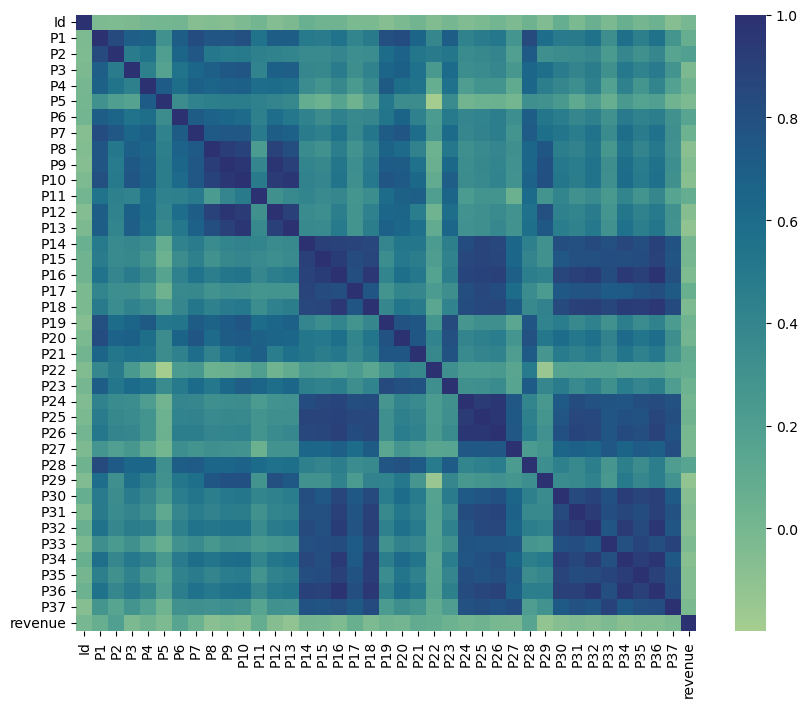

In [56]:
ax = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='crest')

In [63]:
df_orig = df.copy()

In [301]:
df.corr()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P32,P33,P34,P35,P36,P37,revenue,Open_Day,Open_Month,Open_Year
City,1.000000,0.358040,-0.002323,0.211984,0.267885,0.092918,0.020494,-0.171066,0.130226,0.131325,...,0.061590,0.053133,0.078641,0.052951,0.098472,0.091000,0.266076,-0.087356,0.001729,-0.053041
City Group,0.358040,1.000000,0.135286,0.258556,0.421095,0.082172,0.174134,-0.019195,0.414817,0.181911,...,0.169750,0.106115,0.117024,0.127973,0.136617,0.089976,0.237403,0.080826,-0.031128,-0.176147
Type,-0.002323,0.135286,1.000000,0.152816,0.110061,0.066697,0.083299,0.112894,0.141204,0.113859,...,0.501600,0.668628,0.497566,0.612663,0.548612,0.605101,-0.100809,0.042372,-0.046288,-0.096201
P1,0.211984,0.258556,0.152816,1.000000,0.836671,0.695928,0.677941,0.302820,0.700353,0.821923,...,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601,0.070217,-0.159919,0.004843,-0.083658
P2,0.267885,0.421095,0.110061,0.836671,1.000000,0.473551,0.540322,0.203003,0.645304,0.748183,...,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162,0.191518,-0.116768,-0.067952,-0.169950
P3,0.092918,0.082172,0.066697,0.695928,0.473551,1.000000,0.443606,0.168891,0.546338,0.634737,...,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065,-0.024613,-0.203447,0.032650,-0.014200
P4,0.020494,0.174134,0.083299,0.677941,0.540322,0.443606,1.000000,0.715406,0.580716,0.684922,...,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916,0.035685,-0.135940,0.054437,0.019542
P5,-0.171066,-0.019195,0.112894,0.302820,0.203003,0.168891,0.715406,1.000000,0.344179,0.426051,...,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548,-0.028191,0.050767,-0.013642,0.116705
P6,0.130226,0.414817,0.141204,0.700353,0.645304,0.546338,0.580716,0.344179,1.000000,0.713887,...,0.445699,0.301549,0.488895,0.424418,0.452482,0.297679,0.160996,-0.194061,-0.012196,-0.216530
P7,0.131325,0.181911,0.113859,0.821923,0.748183,0.634737,0.684922,0.426051,0.713887,1.000000,...,0.546782,0.355132,0.578787,0.474147,0.560297,0.324432,0.048784,-0.134930,-0.028137,-0.003209


C:\Users\nithin\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'İstanbul'),
 Text(1, 0, 'Ankara'),
 Text(2, 0, 'Diyarbakır'),
 Text(3, 0, 'Tokat'),
 Text(4, 0, 'Gaziantep'),
 Text(5, 0, 'Afyonkarahisar'),
 Text(6, 0, 'Edirne'),
 Text(7, 0, 'Kocaeli'),
 Text(8, 0, 'Bursa'),
 Text(9, 0, 'İzmir'),
 Text(10, 0, 'Sakarya'),
 Text(11, 0, 'Elazığ'),
 Text(12, 0, 'Kayseri'),
 Text(13, 0, 'Eskişehir'),
 Text(14, 0, 'Şanlıurfa'),
 Text(15, 0, 'Samsun'),
 Text(16, 0, 'Adana'),
 Text(17, 0, 'Antalya'),
 Text(18, 0, 'Kastamonu'),
 Text(19, 0, 'Uşak'),
 Text(20, 0, 'Muğla'),
 Text(21, 0, 'Kırklareli'),
 Text(22, 0, 'Konya'),
 Text(23, 0, 'Karabük'),
 Text(24, 0, 'Tekirdağ'),
 Text(25, 0, 'Denizli'),
 Text(26, 0, 'Balıkesir'),
 Text(27, 0, 'Aydın'),
 Text(28, 0, 'Amasya'),
 Text(29, 0, 'Kütahya'),
 Text(30, 0, 'Bolu'),
 Text(31, 0, 'Trabzon'),
 Text(32, 0, 'Isparta'),
 Text(33, 0, 'Osmaniye')]

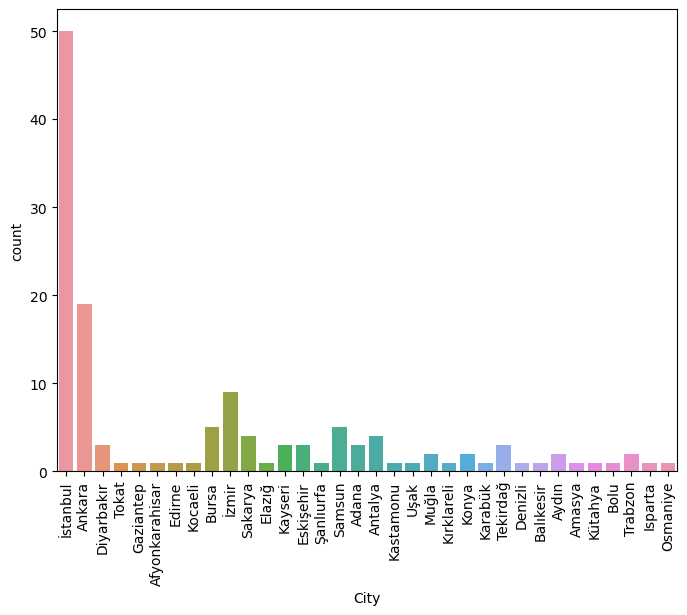

In [227]:
plt.figure(figsize = (8,6))
l = list(df_orig['City'].unique())
chart = sns.countplot(df_orig['City'])
chart.set_xticklabels(labels=l,rotation=90)

C:\Users\nithin\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open_Year', ylabel='count'>

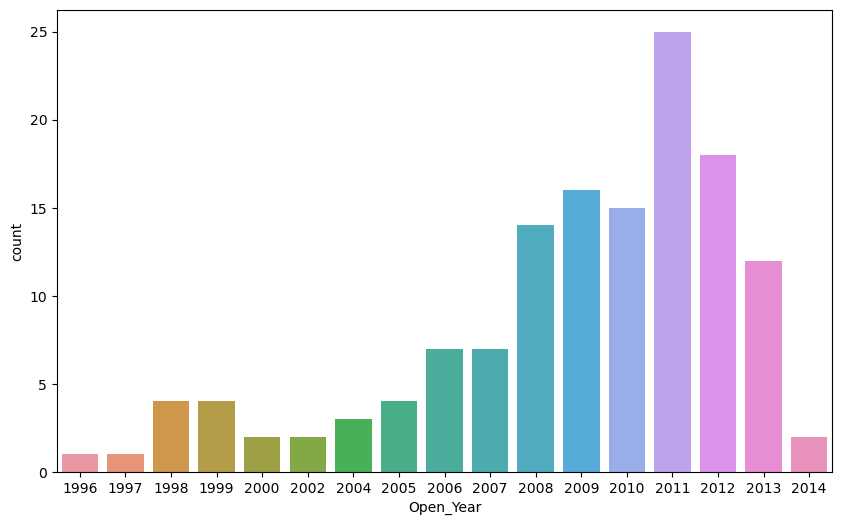

In [230]:
plt.figure(figsize = (10,6))
sns.countplot(df['Open_Year'])

In [66]:
df['Open_Day'] = df['Open Date'].str.split('/').str[1]
df['Open_Month'] = df['Open Date'].str.split('/').str[0]
df['Open_Year'] = df['Open Date'].str.split('/').str[2]

In [67]:
df.head(1)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,revenue,Open_Day,Open_Month,Open_Year
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,4,5,5,4,3,4,5653753,17,7,1999


In [68]:
df.drop('Open Date',axis=1, inplace=True)

In [69]:
df.head(1)

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,Open_Day,Open_Month,Open_Year
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2.0,...,4,5,5,4,3,4,5653753,17,7,1999


In [70]:
df['City'].unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [79]:
df['Open_Year'].unique()

array(['1999', '2008', '2013', '2012', '2009', '2010', '2011', '2000',
       '2014', '2006', '1998', '1996', '2004', '2007', '2005', '2002',
       '1997'], dtype=object)

In [27]:
df['Type'].unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [138]:
city_grpby = df.groupby(['Open_Year','City','Type','revenue']).size().reset_index()
city_grpby

,Open_Year,City,Type,revenue,0
0,1996,Adana,IL,3903884,1
1,1997,İstanbul,IL,4286645,1
2,1998,İstanbul,IL,2551252,1
3,1998,İstanbul,IL,3784230,1
4,1998,İstanbul,IL,4705945,1
...,...,...,...,...,...
132,2013,İstanbul,FC,3426169,1
133,2013,İstanbul,IL,2390534,1
134,2013,İzmir,FC,1756069,1
135,2014,İstanbul,FC,1149870,1


<Figure size 600x400 with 0 Axes>

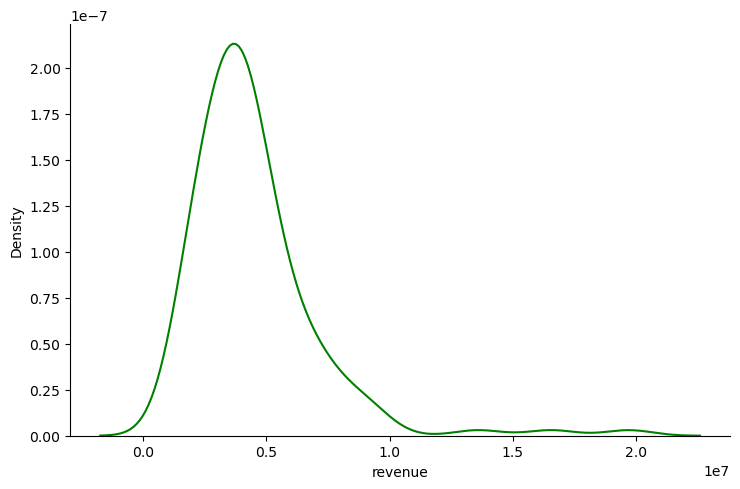

In [234]:
ax = plt.figure(figsize=(6,4))
ax = sns.displot(df_orig['revenue'],aspect=1.5,kind='kde',color='green')

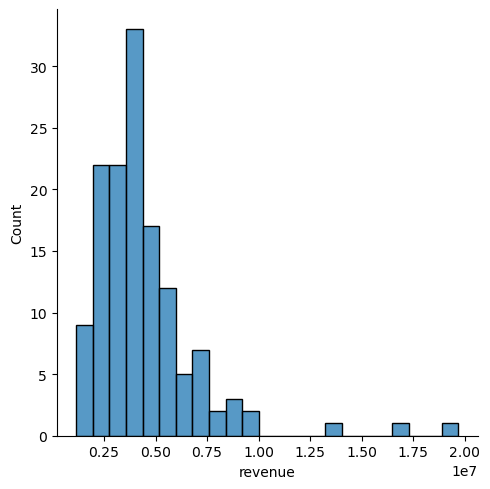

In [223]:
sns.displot(df_orig['revenue'])

In [155]:
df.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,Open_Day,Open_Month,Open_Year
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2.0,...,4,5,5,4,3,4,5653753,17,7,1999
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2.0,...,0,0,0,0,0,0,6923131,14,2,2008
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3.0,...,0,0,0,0,0,0,2055379,9,3,2013
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4.0,...,10,6,18,12,12,6,2675511,2,2,2012
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2.0,...,3,2,3,4,3,3,4316715,9,5,2009


In [152]:
##Processing  Categorical Features

In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [156]:
df['City'] = le.fit_transform(df['City'])

In [161]:
df['City Group'] = df['City Group'].map({'Big Cities':1,'Other':0})

In [165]:
df['Type'] = df['Type'].map({'FC':0,'IL':1,'DT':2})

In [171]:
df['Open_Day'] = df['Open_Day'].astype(int)
df['Open_Month'] = df['Open_Month'].astype(int)
df['Open_Year'] = df['Open_Year'].astype(int)

In [172]:
df.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,Open_Day,Open_Month,Open_Year
0,0,31,1,1,4,5.0,4.0,4.0,2,2.0,...,4,5,5,4,3,4,5653753,17,7,1999
1,1,3,1,0,4,5.0,4.0,4.0,1,2.0,...,0,0,0,0,0,0,6923131,14,2,2008
2,2,10,0,1,2,4.0,2.0,5.0,2,3.0,...,0,0,0,0,0,0,2055379,9,3,2013
3,3,28,0,1,6,4.5,6.0,6.0,4,4.0,...,10,6,18,12,12,6,2675511,2,2,2012
4,4,14,0,1,3,4.0,3.0,4.0,2,2.0,...,3,2,3,4,3,3,4316715,9,5,2009


In [235]:
#for i in df.columns:
#    if (len(df.loc[df[i] == 0])) > 5: 
#        print( i ,' : ', (len(df.loc[df[i] == 0])),end=' // ')

## Test_train_split

In [245]:
X = df.drop('revenue',axis=1)
y = df['revenue']

In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [248]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(109, 43) (109,)
(28, 43) (28,)


## Model Building

In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [256]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [277]:
tra_pred = xgb.predict(X_train)

In [280]:
r2_train = r2_score(y_train,tra_pred)
r2_train

0.9999999999990913

In [281]:
test_predict = xgb.predict(X_test)

In [283]:
r2_test = r2_score(y_test,test_predict)

In [288]:
from sklearn.pipeline import make_pipeline

In [287]:
def train(model, X, y):
    
    model.fit(X, y)
    pred = model.predict(X)
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 3939153650351.085
CV Score: 19068183541647.51


<AxesSubplot:title={'center':'Model Coefficients'}>

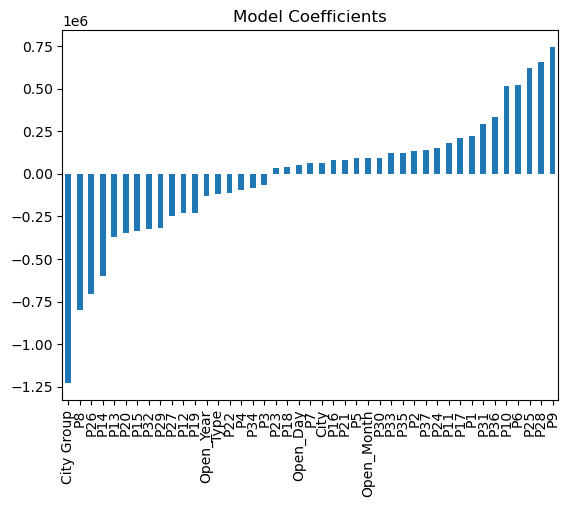

In [292]:
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
train(model, X, y)
#coef = pd.Series(model.coef, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 4013815909543.7754
CV Score: 11747540085359.684


<AxesSubplot:title={'center':'Model Coefficients'}>

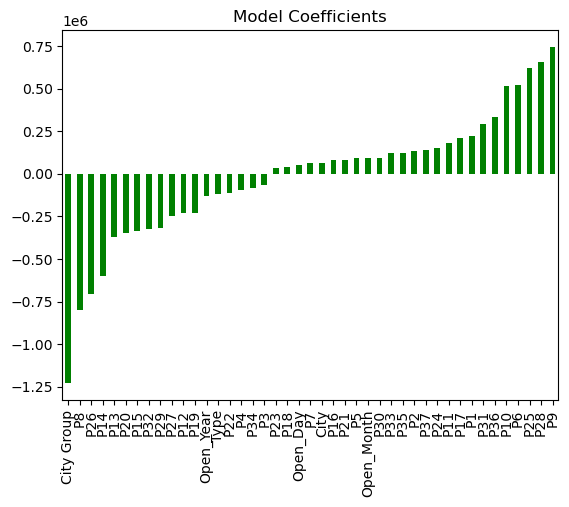

In [298]:
model = make_pipeline(StandardScaler(with_mean=False), Ridge())
train(model, X, y)
coef.plot(kind='bar', title="Model Coefficients",color='green')

C:\Users\nithin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.580e+14, tolerance: 9.025e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\nithin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.215e+14, tolerance: 5.730e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\nithin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

Model Report
MSE: 3939153953241.3896
CV Score: 19088365850324.86


<AxesSubplot:>

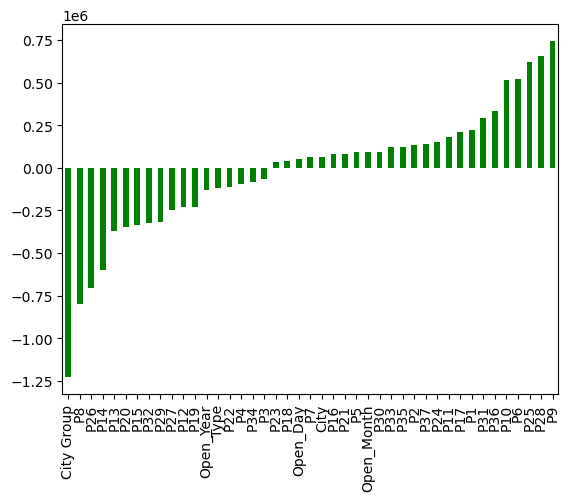

In [300]:
model = make_pipeline(StandardScaler(with_mean=False), Lasso())
train(model, X, y)
coef.plot(kind='bar',color='green')

Model Report
MSE: 975017835938.8218
CV Score: 6666071309846.533


<AxesSubplot:>

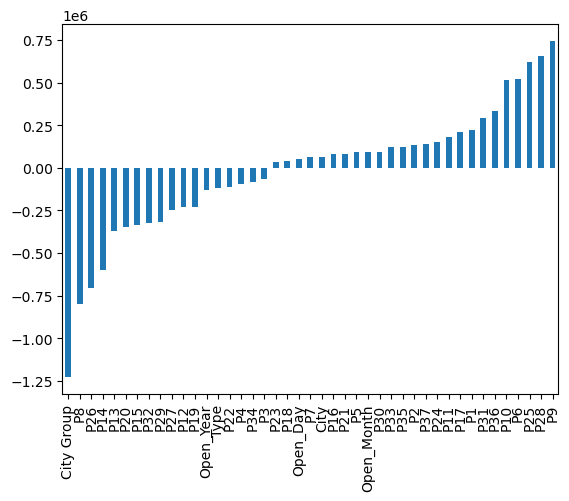

In [295]:
model = make_pipeline(StandardScaler(with_mean=False), RandomForestRegressor())
train(model, X, y)
coef.plot(kind='bar')